<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/summerSchool/FuzzyLogic_1_AirCond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# air conditioning unit, fuzzy logic control with skfuzzy

The goal is to represent rules for controlling an air conditioner.

Very little information is provided, mainly the action table based on the current perception and the desired state.

| Ambient Temperature\Goal | Very Cold | Cold | Warm | Hot | Very Hot |
| ------------------------- | --------- | ---- | ----- | --- | --------- |
| Very Cold | Stabilize | Heat | Heat | Heat Fast | Heat Fast |
| Cold | Cool | Stabilize | Heat | Heat | Heat Fast |
| Warm | Cool | Cool | Stabilize | Heat | Heat |
| Hot | Cool Fast | Cool | Cool | Stabilize | Heat |
| Very Hot | Cool Fast | Cool Fast | Cool | Cool | Stabilize |

Temperatures range from 0° (very cold) to 40° (very hot).

Propose a model for:
- temperatures,
- the strength of the air coming out of the air conditioner; choose the interval to encode the orders from 'cool fast' to 'heat fast'
- as well as the rules corresponding to the table.

---
### Python Installation and Import

If scikit-fuzzy is not installed, use the following line (under colab):

In [ ]:
# !pip install -U scikit-fuzzy
# locally, (thonny, pycharm, ...) remove the '!'

In [12]:
# imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

---
## Antecedents and Consequents
- Antecedents are the variables used to make decisions (here observation and desire)
- Consequents are the deductions (here the order given to the motor)

In [25]:
#### Antecedent and Consequent
# observed weather is in a range from 0 to 41 with a step of 0.5
observation = ctrl.Antecedent(np.arange(0, 41, .5), 'observation')
# desired weather is in a range from 0 to 41 with a step of 0.5
desire = ctrl.Antecedent(np.arange(0, 41, .5), 'desire')
# desired action is in a range from [-1, 1] with a step of 0.1
motor = ctrl.Consequent(np.arange(-1, 1.1, 0.1), 'motor')

---
### Fuzzy Sets
Next, we define the fuzzy sets used in the antecedents and consequents.

For example, we can say that the temperature is 'hot' between 20° and 25°, ...

In [26]:
temp_very_cold = fuzz.sigmf(observation.universe, 7, -0.8)
temp_cold = fuzz.gbellmf(observation.universe, 4, 2, 14)
temp_warm = fuzz.gbellmf(observation.universe, 4, 2, 21)
temp_hot = fuzz.gbellmf(observation.universe, 4, 2, 27)
temp_very_hot = fuzz.sigmf(observation.universe, 30, 0.8)
# we assign these sets by naming them to the antecedent "observation"
observation['very_cold'] = temp_very_cold
observation['cold'] = temp_cold
observation['warm'] = temp_warm
observation['hot'] = temp_hot
observation['very_hot'] = temp_very_hot

We can check the membership curves:
- *in this illustration, the curves are bell-shaped, but you can define them differently*

c:\Users\emmanuel adam\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


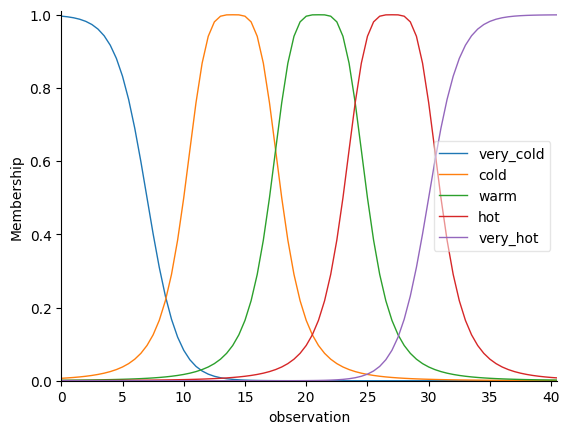

In [27]:
observation.view()

In [28]:
# TO DO
# similarly, assign fuzzy sets for the antecedent "desire"
# we assign these sets by naming them to the antecedent "observation"
desire['very_cold'] = temp_very_cold
desire['cold'] = temp_cold
desire['warm'] = temp_warm
desire['hot'] = temp_hot
desire['very_hot'] = temp_very_hot

---
#### The Air Conditioner

The air conditioner decides to:
- cool fast
- cool
- stabilize
- heat
- heat fast

Define the fuzzy sets for this consequent

In [29]:
# Define fuzzy sets for decision making
cool_fast = fuzz.sigmf(motor.universe, -0.5, -10)
cool = fuzz.gbellmf(motor.universe, 0.5, 2, -0.5)
stabilize = fuzz.gbellmf(motor.universe, 0.5, 2, 0)
heat = fuzz.gbellmf(motor.universe, 0.5, 2, 0.5)
heat_fast = fuzz.sigmf(motor.universe, 0.5, 10)

# And assign these sets to the consequent "motor"
motor['cool_fast'] = cool_fast
motor['cool'] = cool
motor['stabilize'] = stabilize
motor['heat'] = heat
motor['heat_fast'] = heat_fast

Below is a simple illustration of fuzzy sets for the consequent motor.

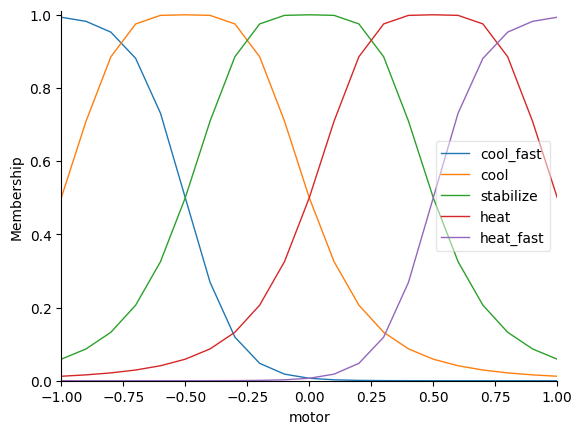

In [30]:
motor.view()

---
## Definition of Fuzzy Rules
Recall, we want to define:

| Ambient Temperature\Goal | Very Cold | Cold | Warm | Hot | Very Hot |
| ------------------------- | --------- | ---- | ----- | --- | --------- |
| Very Cold | Stabilize | Heat | Heat | Heat Fast | Heat Fast |
| Cold | Cool | Stabilize | Heat | Heat | Heat Fast |
| Warm | Cool | Cool | Stabilize | Heat | Heat |
| Hot | Cool Fast | Cool | Cool | Stabilize | Heat |
| Very Hot | Cool Fast | Cool Fast | Cool | Cool | Stabilize |

Describe the set of rules that represent the behavior of the air conditioner.

In [31]:

rules = []

rules.append(ctrl.Rule(observation['very_cold'] & desire['very_cold'], motor['stabilize']))
rules.append(ctrl.Rule(observation['very_cold'] & desire['cold'], motor['heat']))
rules.append(ctrl.Rule(observation['very_cold'] & desire['warm'], motor['heat']))
rules.append(ctrl.Rule(observation['very_cold'] & desire['hot'], motor['heat_fast']))
rules.append(ctrl.Rule(observation['very_cold'] & desire['very_hot'], motor['heat_fast']))

rules.append(ctrl.Rule(observation['cold'] & desire['very_cold'], motor['cool']))
rules.append(ctrl.Rule(observation['cold'] & desire['cold'], motor['stabilize']))
rules.append(ctrl.Rule(observation['cold'] & desire['warm'], motor['heat']))
rules.append(ctrl.Rule(observation['cold'] & desire['hot'], motor['heat']))
rules.append(ctrl.Rule(observation['cold'] & desire['very_hot'], motor['heat_fast']))

rules.append(ctrl.Rule(observation['warm'] & desire['very_cold'], motor['cool']))
rules.append(ctrl.Rule(observation['warm'] & desire['cold'], motor['cool']))
rules.append(ctrl.Rule(observation['warm'] & desire['warm'], motor['stabilize']))
rules.append(ctrl.Rule(observation['warm'] & desire['hot'], motor['heat']))
rules.append(ctrl.Rule(observation['warm'] & desire['very_hot'], motor['heat']))

rules.append(ctrl.Rule(observation['hot'] & desire['very_cold'], motor['cool_fast']))
rules.append(ctrl.Rule(observation['hot'] & desire['cold'], motor['cool']))
rules.append(ctrl.Rule(observation['hot'] & desire['warm'], motor['cool']))
rules.append(ctrl.Rule(observation['hot'] & desire['hot'], motor['stabilize']))
rules.append(ctrl.Rule(observation['hot'] & desire['very_hot'], motor['heat']))

rules.append(ctrl.Rule(observation['very_hot'] & desire['very_cold'], motor['cool_fast']))
rules.append(ctrl.Rule(observation['very_hot'] & desire['cold'], motor['cool_fast']))
rules.append(ctrl.Rule(observation['very_hot'] & desire['warm'], motor['cool']))
rules.append(ctrl.Rule(observation['very_hot'] & desire['hot'], motor['cool']))
rules.append(ctrl.Rule(observation['very_hot'] & desire['very_hot'], motor['stabilize']))

In [32]:
# we decide to use all the rules by compiling them
clim_rules = ctrl.ControlSystem(rules)

# we create a decision support tool based on these rules
clim_decision = ctrl.ControlSystemSimulation(clim_rules)

----
### Using the Fuzzy Decision Support Tool

What to do if the room is at 34° and we want a temperature of 19°?

In [33]:
clim_decision.input['observation'] = 20
clim_decision.input['desire'] = 19

clim_decision.compute()

print(f"to move from {clim_decision.input._get_inputs()['observation']}° to {clim_decision.input._get_inputs()['desire']}°, the motor takes the value {clim_decision.output['motor']:.2f}")

to move from 20° to 19°, the motor takes the value -0.03


According to what has been coded, it seems that we should cool normally...
We can see the activated consequents and their activation levels with this function:

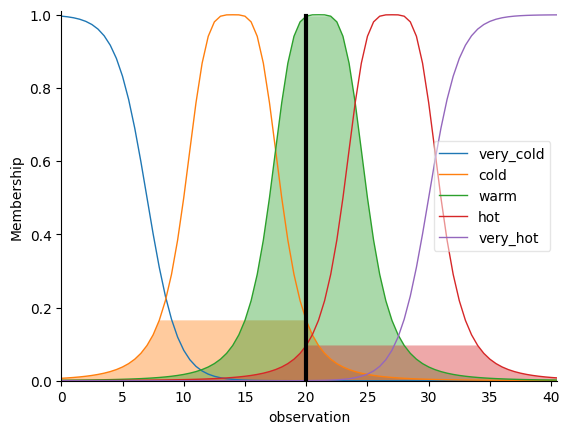

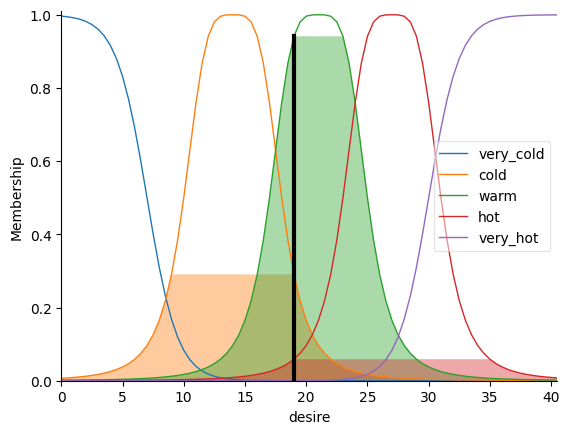

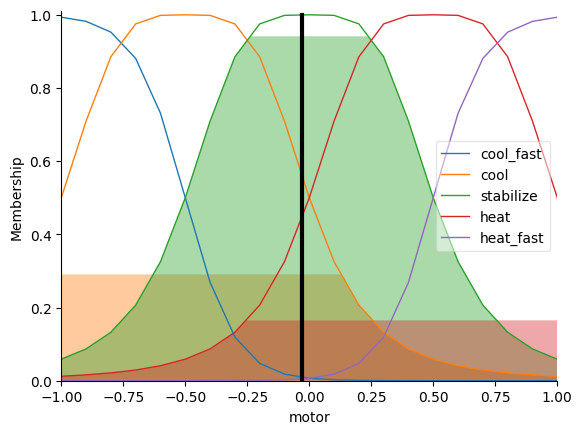

In [34]:
observation.view(sim=clim_decision)
desire.view(sim=clim_decision)
motor.view(sim=clim_decision)

---
#### Impact of the Curves
**TO DO**
- Change the fuzzy sets to study the impact on the result
 - comment on your results

---
### Explicit Help
**TO DO**
Provide a Python code to clearly give the recommendation to the person managing the air conditioner, not just a value. (e.g., heat strongly rather than +0.8)

---